<a href="https://colab.research.google.com/github/ShawnTayNWU/MSDS458/blob/MSDS458/Assignment_4_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import packages 


In [1]:
import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd
from packaging import version
from collections import Counter
import time

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

from keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical

from timeit import default_timer as timer #import a timer
from datetime import datetime


In [2]:
%matplotlib inline
np.set_printoptions(precision=3, suppress=True)

### Verify TensorFlow Version and Keras Version

In [3]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.7.0


In [4]:
print("Keras version: ", keras.__version__)

Keras version:  2.7.0


### Functions for Research Assignment

In [5]:
def print_validation_report(y_test, predictions):
    print("Classification Report")
    print(classification_report(y_test, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(y_test, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(y_test, predictions)))) 

In [6]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

### Mount Google Drive to Colab Environment


In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


###  TensorFlow Datasets Information<br>
<div class="alert alert-block alert-info">
    <b> stanford_online_products</b><br>
    See https://www.tensorflow.org/datasets/catalog/stanford_online_products
    </div>

In [8]:
#register  ag_news_subset so that tfds.load doesn't generate a checksum (mismatch) error
!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums --datasets=stanford_online_products

# https://www.tensorflow.org/datasets/splits
# The full `train` and `test` splits, interleaved together.
ri = tfds.core.ReadInstruction('train') + tfds.core.ReadInstruction('test')
dataset_all, info = tfds.load('stanford_online_products', with_info=True,  split=ri)



Streaming output truncated to the last 5000 lines.
Extraction completed...: 0 file [01:46, ? file/s]
Dl Completed...:   0% 0/1 [01:46<?, ? url/s]
Dl Size...:  53% 1572/2940 [01:46<01:27, 15.57 MiB/s]

Dl Completed...:   0% 0/1 [01:46<?, ? url/s]
Dl Size...:  54% 1573/2940 [01:46<01:27, 15.57 MiB/s]

Extraction completed...: 0 file [01:46, ? file/s]
Dl Completed...:   0% 0/1 [01:46<?, ? url/s]
Dl Size...:  54% 1574/2940 [01:46<01:28, 15.41 MiB/s]

Dl Completed...:   0% 0/1 [01:46<?, ? url/s]
Dl Size...:  54% 1575/2940 [01:46<01:28, 15.41 MiB/s]

Extraction completed...: 0 file [01:46, ? file/s]
Dl Completed...:   0% 0/1 [01:46<?, ? url/s]
Dl Size...:  54% 1576/2940 [01:46<01:28, 15.48 MiB/s]

Dl Completed...:   0% 0/1 [01:46<?, ? url/s]
Dl Size...:  54% 1577/2940 [01:46<01:28, 15.48 MiB/s]

Extraction completed...: 0 file [01:46, ? file/s]
Dl Completed...:   0% 0/1 [01:46<?, ? url/s]
Dl Size...:  54% 1578/2940 [01:46<01:27, 15.48 MiB/s]

Dl Completed...:   0% 0/1 [01:46<?, ? url/s]
Dl S

In [9]:
print(info)

tfds.core.DatasetInfo(
    name='stanford_online_products',
    version=1.0.0,
    description='Stanford Online Products Dataset',
    homepage='http://cvgl.stanford.edu/projects/lifted_struct/',
    features=FeaturesDict({
        'class_id': ClassLabel(shape=(), dtype=tf.int64, num_classes=22634),
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'super_class_id': ClassLabel(shape=(), dtype=tf.int64, num_classes=12),
        'super_class_id/num': ClassLabel(shape=(), dtype=tf.int64, num_classes=12),
    }),
    total_num_examples=120053,
    splits={
        'test': 60502,
        'train': 59551,
    },
    supervised_keys=None,
    citation="""@inproceedings{song2016deep,
     author    = {Song, Hyun Oh and Xiang, Yu and Jegelka, Stefanie and Savarese, Silvio},
     title     = {Deep Metric Learning via Lifted Structured Feature Embedding},
     booktitle = {IEEE Conference on Computer Vision and Pattern Recognition (CVPR)},
     year      = {2016}
    }""",
   

,class_id,image,super_class_id,super_class_id/num
0,2773,,3 (coffee_maker),3
1,243,,0 (bicycle),0
2,8848,,9 (stapler),9
3,2942,,3 (coffee_maker),3
4,4740,,5 (kettle),5
5,10298,,10 (table),10
6,9384,,10 (table),10
7,9008,,9 (stapler),9
8,4592,,5 (kettle),5
9,214,,0 (bicycle),0

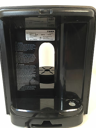
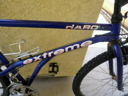
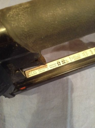
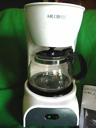
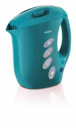
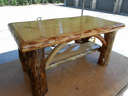
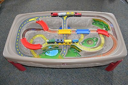
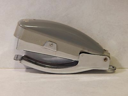
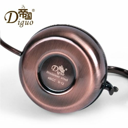
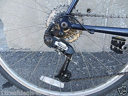

In [10]:
tfds.as_dataframe(dataset_all.take(10),info)


### Review Labels (Categories) 

In [11]:
print(f'There are {info.features["super_class_id"].num_classes} classes in the dataset.')
print(f'The class names are {info.features["super_class_id"].names}')

There are 12 classes in the dataset.
The class names are ['bicycle', 'cabinet', 'chair', 'coffee_maker', 'fan', 'kettle', 'lamp', 'mug', 'sofa', 'stapler', 'table', 'toaster']


In [12]:
# classes dictionary
categories =dict(enumerate(info.features["super_class_id"].names))
categories

{0: 'bicycle',
 1: 'cabinet',
 2: 'chair',
 3: 'coffee_maker',
 4: 'fan',
 5: 'kettle',
 6: 'lamp',
 7: 'mug',
 8: 'sofa',
 9: 'stapler',
 10: 'table',
 11: 'toaster'}

In [13]:
 
#class_names = dataset_all.super_class_id
#plt.figure(figsize=(10, 10))
#for images, labels in dataset_all.take(1):
#    for i in range(9):
#        ax = plt.subplot(3, 3, i + 1)
#        plt.imshow(images[i].numpy().astype("uint8"))
#        plt.title(class_names[labels[i]])
#        plt.axis("off")

### Preprocessing Data Create Input Pipeline

In [14]:
# register stanford_online_products so that tfds.load doesn't generate a checksum (mismatch) error
!python -m tensorflow_datasets.scripts.download_and_prepare --register_checksums --datasets=stanford_online_products

dataset, info = tfds.load('stanford_online_products', with_info=True,  split=['train[:95%]','train[95%:]', 'test[:]'])                      
train_dataset, validation_dataset, test_dataset = dataset


2021-11-18 04:39:23.461399: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
I1118 04:39:23.461698 140345822115712 download_and_prepare.py:200] Running download_and_prepare for dataset(s):
stanford_online_products
I1118 04:39:23.462711 140345822115712 dataset_info.py:361] Load dataset info from /root/tensorflow_datasets/stanford_online_products/1.0.0
I1118 04:39:23.464677 140345822115712 download_and_prepare.py:138] download_and_prepare for dataset stanford_online_products/1.0.0...
I1118 04:39:23.465073 140345822115712 dataset_builder.py:299] Reusing dataset stanford_online_products (/root/tensorflow_datasets/stanford_online_products/1.0.0)
name: "stanford_online_products"
description: "Stanford Online Products Dataset"
citation: "@inproceedings{song2016deep,\n author    = {Song, Hyun Oh and Xiang, Yu and Jegelka, Stefanie and Savarese, Silvio},\n title     = {Deep Metric Learning via Lifted Structured

,class_id,image,super_class_id,super_class_id/num
0,2773,,3 (coffee_maker),3
1,243,,0 (bicycle),0
2,8848,,9 (stapler),9
3,2942,,3 (coffee_maker),3
4,4740,,5 (kettle),5
5,10298,,10 (table),10
6,9384,,10 (table),10
7,9008,,9 (stapler),9
8,4592,,5 (kettle),5
9,214,,0 (bicycle),0

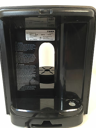
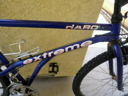
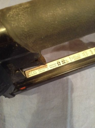
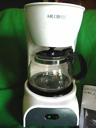
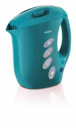
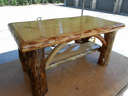
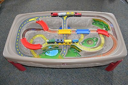
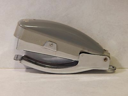
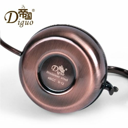
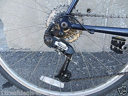

In [15]:
tfds.as_dataframe(train_dataset.take(10),info)

,class_id,image,super_class_id,super_class_id/num
0,5217,,6 (lamp),6
1,3267,,3 (coffee_maker),3
2,7786,,8 (sofa),8
3,8976,,9 (stapler),9
4,3469,,3 (coffee_maker),3
5,669,,1 (cabinet),1
6,10874,,11 (toaster),11
7,6929,,7 (mug),7
8,1809,,2 (chair),2
9,9114,,9 (stapler),9

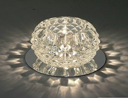
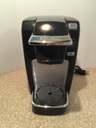
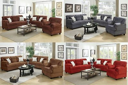
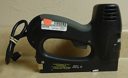
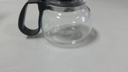
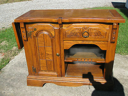
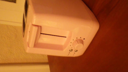
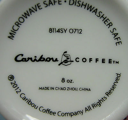
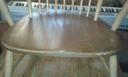
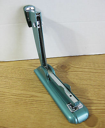

In [16]:
tfds.as_dataframe(validation_dataset.take(10),info)

In [17]:
print(train_dataset.shape, validation_dataset.shape, test_dataset.shape)

AttributeError: ignored

In [18]:
train_dataset_norm = train_dataset/255


TypeError: ignored

In [19]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)         
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator =  train_datagen (
        train_dataset,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

validation_generator = test_datagen(
        validation_dataset,
        target_size=(150, 150),
        batch_size=20,
          class_mode='binary')

TypeError: ignored

### Build CNN Model

In [20]:
model = models.Sequential()
model.add(layers.Conv2D(filters=128, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu,input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D((2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=256, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(filters=512, kernel_size=(3, 3), strides=(1, 1), activation=tf.nn.relu))
model.add(layers.MaxPool2D(pool_size=(2, 2),strides=2))
model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(units=384, activation=tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)))
model.add(layers.Dense(units=10, activation=tf.nn.softmax))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 256)       295168    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 256)        0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 6, 6, 256)         0

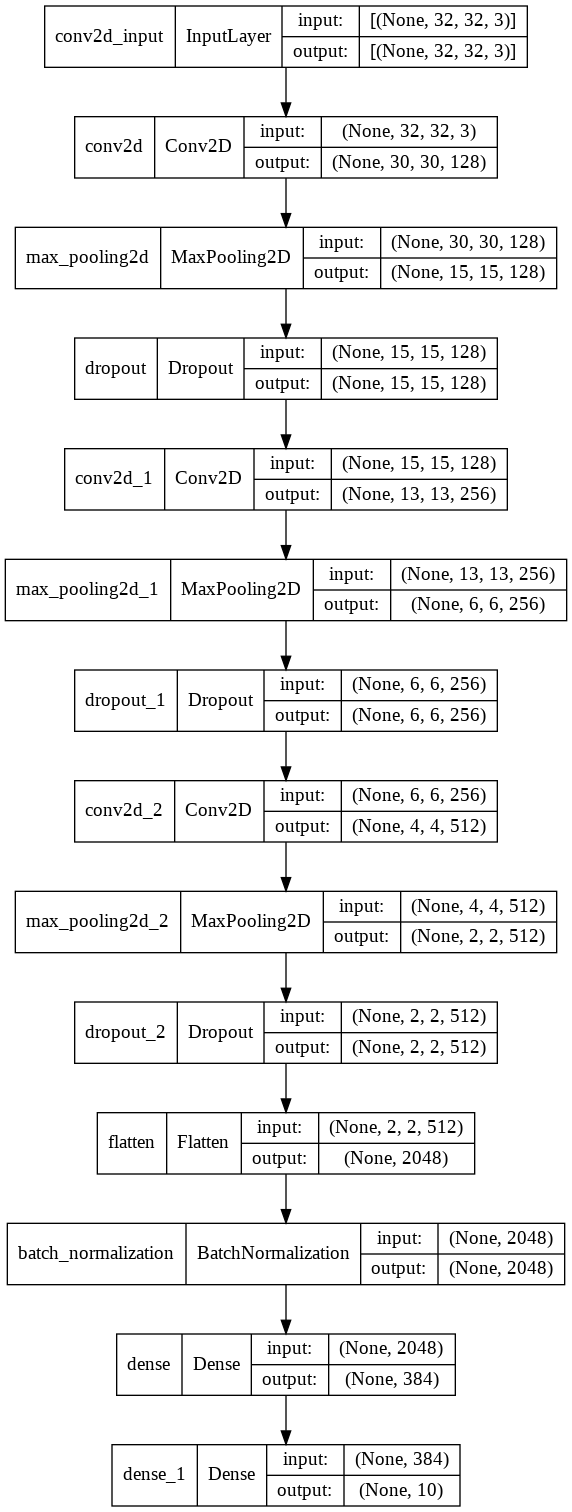

In [22]:
keras.utils.plot_model(model, "CIFAR10.png", show_shapes=True) 

### Compile the model

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

## Training the model

In [ ]:
history = model.fit(x_train_norm
                    ,y_train_split
                    ,epochs=200
                    ,batch_size=512
                    ,validation_data=(x_valid_norm, y_valid_split)
                    ,callbacks=[
                    tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3),
                    tf.keras.callbacks.ModelCheckpoint('/content/gdrive/My Drive/Colab Notebooks/models/model_{val_accuracy:.4f}.h5', save_best_only=True,
                                        save_weights_only=False, monitor='val_accuracy')]                                                                                                           
                   )



In [ ]:
history = model.fit(
      train_dataset,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_dataset,
      validation_steps=50)